In [1]:
import pandas as pd
import re
import os
import inspect

In [2]:
DEFAULT_CITY_PATH = os.path.join("..", "data", "yeshuvim_20200301.csv")
DEFAULT_ESSENCE_JSON_PATH = os.path.join("essensce_regex.json")

#DATA_PATH = r"../data/EPI_CoronaExposure_XRM_NEW_31_3_1807_TableToExcel.csv"
DATA_PATH = r"../data/test.csv"


df = pd.read_csv(DATA_PATH, index_col=0)

In [3]:
yeshuv_df = pd.read_csv(DEFAULT_CITY_PATH, encoding="cp1255", usecols=["שם_ישוב"], skiprows=1, dtype=str)
yeshuv_df["שם_ישוב"] = yeshuv_df["שם_ישוב"].apply(lambda x: x.split("  ")[0].replace(")","").replace("(",""))

union_set_1 = set(yeshuv_df["שם_ישוב"].tolist())
union_set_2 = set(yeshuv_df["שם_ישוב"].str.replace("-"," ").tolist())
union_set_3 = set(yeshuv_df["שם_ישוב"].str.replace("י","יי").tolist())
union_set_4 = set(yeshuv_df["שם_ישוב"].str.replace(" - ", " ").tolist())
union_set_5 = set(yeshuv_df["שם_ישוב"].str.replace("יי","י").tolist())
union_set_6 = set(yeshuv_df["שם_ישוב"].str.split("-", " ").tolist())

split_set = []
for elem in yeshuv_df["שם_ישוב"].str.split("-").tolist():
    for name in elem:
        split_set.append(name)
union_set_7 = set(split_set)

temp = set(union_set_1.union(union_set_2).union(union_set_3).union(union_set_4).union(union_set_5).union(union_set_6).union(union_set_7))

all_seperated_names = []

for name in temp:
    try:
        candidate = name.rstrip().lstrip()
        all_seperated_names.append(candidate)
        if "תל אביב" in candidate:
            print(candidate)            
    except:
        pass

all_seperated_names = set(all_seperated_names)

print("מכבים" in all_seperated_names)
print("תל אביב" in all_seperated_names)
print("אום אל-פחם" in all_seperated_names)
print("מודיעין" in all_seperated_names)
print("אופ אל פחם" in all_seperated_names)
print("עינב" in all_seperated_names)
print("ענב" in all_seperated_names)


תל אביב יפו
תל אביב - יפו
תל אביב   יפו
תל אביב
True
True
True
True
False
False
True


In [4]:
loc_list = [r"'רחוב ", "שדרות","רח"]
syng_list = ["בית כנסת", "בית הכנסת", r'ביה"כ', r"ביה'כ", 'ביהכ"נ', 'בהיכ"נ']
yeshiva_list = ["ישיבה", "ישיבת", "כולל", "מדרש"]
grocery_list = [ "מכולת","מגה בעיר", "סנטר", "סופר", "שופרסל",
                "אושר עד", "מאפית", "צרכניית"
                "נתיב החסד", "מגא בעיר", "קיוסק", "רמי לוי", "מרכול"]
club_list = ["מועדון", "אולם", "ברקה", "אולמ"]
pharmecy_list = ["קופת חולים מכבי", "בית מרקחת", "מרפאה", "סופרפארם", "שופרסל בי"
                 ,"פארם", "קופת חולים כללי", "טרם", "מרפאת", "עזר מציון", 'קופ"ח', 'קופת חולים מאוחדת',
                "קופח"]
hospital_list = [r"ביח'", r"מיון", r'בי"ח', "קורונה",'בה"ח', "בית חולים", "הדסה", "חדר ניתוח"
                 , "תל השומר", "אשפוז" "דימות", "מחלקה פנימית", "חדר ניתו", "רפואה דחופה"]
elderly_list = ["אבות", "בית הורים", "דיור מוגן"]
mikve_list = ["מקווה", "מקוה"]
gym_list = ["מכון כושר", "מועדון כושר", "קאנטרי"]
restaurant_list = ["מסעדה" ,"קפה", "מסעדת", "חדר אוכל"]
church_list = ["כנסיית", "כנסייה", "כנסיה", "מינזר", "מנזר", "כנסית"]
cemetery_list = ["קברות", "עלמין", "קבר"]
store_list = ["חנות", 'בע"מ']
bank_list = ["בנק"]
fuel_list = ["דלק", "פז" , "סונול"]
college_list = ["מכללה", "מכללת", "אוניברסיטה", "אוניברסיטת", "סמי שמעון"]
school_list = ["בית ספר", "בית הספר", "ביס'", 'ביה"ס', 'ביס']



column_list = ["loc", "syng", "yeshiva", "grocery", "club", 
               "hospital", "pharmecy", "elderly", "mikve", "gym",
               "restaurant", "church", "cemetery", "store", "bank",
               "fuel", "college", "school"]

topic_list = [loc_list, syng_list, yeshiva_list, grocery_list, club_list, 
              hospital_list, pharmecy_list ,elderly_list, mikve_list, gym_list,
              restaurant_list, church_list, cemetery_list, store_list, bank_list,
              fuel_list, college_list, school_list]
regex_list = [r"(?=("+'|'.join(current_list)+r"))" for current_list in topic_list]

In [5]:
df.head()

,OBJECTID,מקום,הערות,תאריך,שעות שהייה,סוג מיקום,x,y,"('ArcGIS',)_x","('ArcGIS',)_y","('Photon',)_x","('Photon',)_y","('Nominatim',)_x","('Nominatim',)_y"
0,14701,"מועדון ""זוזו"", שדרות רוטשילד 32, תל אביב",בכל שעות פעילות,9/3/2020,00:00-23:59,מיקום חולה,34.772886,32.063224,34.772787,32.063283,NaN,NaN,NaN,NaN
1,14702,"דיור מוגן ""מגדל נופים"" רחוב הנריטה סאלד 2 ירושלים",NaN,9/3/2020,00:00-23:59,מיקום חולה,35.171270,31.762360,35.161756,31.758740,NaN,NaN,NaN,NaN
2,14703,"מועדון Sura Mare, רחוב סעדיה גאון 24, תל אביב",מסיבת פורים,9/3/2020,00:00-00:30,מיקום חולה,34.782293,32.068206,34.782243,32.068038,NaN,NaN,NaN,NaN
3,14704,"מועדון ""Sura Mare"", רחוב סעדיה גאון 24, תל אביב",מסיבת פורים,9/3/2020,00:00-03:00,מיקום חולה,34.782293,32.068206,34.782243,32.068038,NaN,NaN,NaN,NaN
4,14705,"אולם ""שבע"" רח' הצפירה 21, ת""א",אירוע,9/3/2020,00:00-02:00,מיקום חולה,34.782718,32.060795,34.782458,32.060849,NaN,NaN,NaN,NaN


In [8]:
"מקום" in df.columns.tolist()

True

In [10]:
if "מקום" in df.columns.tolist():
    df.rename(columns={"מקום":"place"}, inplace=True)
df_topics = df[["place"]].astype("str")
print(type(df_topics))
for current_column_name, current_regex in zip(column_list, regex_list):
    df_topics["is_" + current_column_name] = df_topics["place"].apply(lambda x: bool(re.search(current_regex, x)))

['OBJECTID', 'place', 'הערות', 'תאריך', 'שעות שהייה', 'סוג מיקום', 'x', 'y', "('ArcGIS',)_x", "('ArcGIS',)_y", "('Photon',)_x", "('Photon',)_y", "('Nominatim',)_x", "('Nominatim',)_y"]
<class 'pandas.core.frame.DataFrame'>


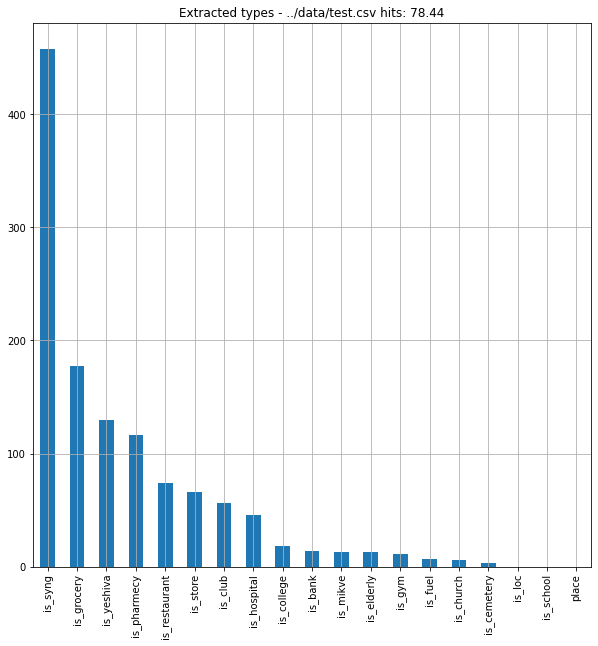

In [11]:
essesnce_hist = df_topics[df_topics[df_topics.columns[2:-1]].astype(int) == 1].count().sort_values(ascending=False) #ignoring locations
hit_percentage = "{:.2f}".format(essesnce_hist.sum() / len(df_topics) * 100)
plot = essesnce_hist.plot.bar(grid=True, figsize=(10,10), title="Extracted types - " + DATA_PATH + " hits: " + hit_percentage)
fig = plot.get_figure()
fig.savefig("historgram.jpeg")

In [ ]:
print("extracted essesnces percentage: {:.2f}".format(essesnce_hist.sum() / len(df_topics) * 100))

In [ ]:
#df_topics[df_topics[df_topics.columns[2:-1]].astype(int) == 1].hist(bins=len(column_list))

In [ ]:
df_topics[df_topics[df_topics.columns[2:]].astype(int).sum(axis=1) == 0].to_csv("uncategorised.csv") #getting all rows without regex hits

In [ ]:
yeshuv_df[yeshuv_df["שם_ישוב"].str.contains("מודיעין")]

In [ ]:
#df_topics["yeshuv"] = df_topics["מקום"].apply(lambda x: yeshuv_df[yeshuv_df["שם_ישוב"].str.contains("תל אביב")])

def extract_city(text):
    candidate_text = text[-12:]
    best_match = "   "
    for city in all_seperated_names:
        if city == candidate_text or (city in candidate_text and len(city) > len(best_match)):
            best_match = city
    #print("text: " + text + " candidate_text: " + str(candidate_text) + " , city: " + best_match)
    return best_match

df_topics["yeshuv"] = df_topics["מקום"].apply(extract_city)

In [ ]:

#essesnce_hist.plot.bar(grid=True, figsize=(10,10), title="Extracted Site Essense Occurences")
df_topics["yeshuv"].hist(figsize=(20,20), xrot=90, xlabelsize=12)

In [ ]:
city_hist